In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
hp_data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
hp_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
hp_data.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

# Célváltozó

Text(0.5, 1.0, 'Log SalePrice Eloszlás')

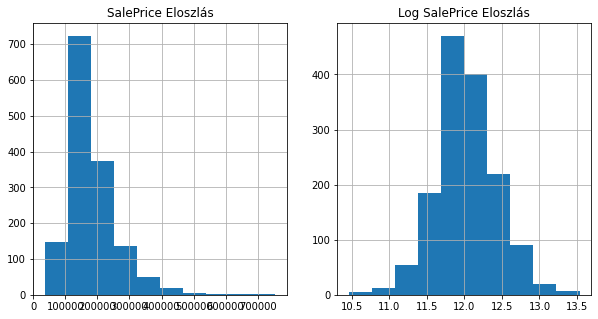

In [7]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
hp_data["SalePrice"].hist(ax=axes[0])
axes[0].set_title("SalePrice Eloszlás")
np.log(hp_data["SalePrice"]).hist(ax=axes[1])
axes[1].set_title("Log SalePrice Eloszlás")


# Legfontosabb változók

## Méret
* Lakóterület
* Pince
* Bedroom

## Állapot
* OverallQual
* Kor
* KitchenQual
* Functional

## Felszereltség
* HeatingQC
* CentralAir
* FullBath

## Lokáció
* BldgType
* MSZoning

Amire itt ezek közül nem láttok ábrát, háziként csináljatok! NEM tilos másra is csinálni, főleg ha a változó fontosnak tűnik

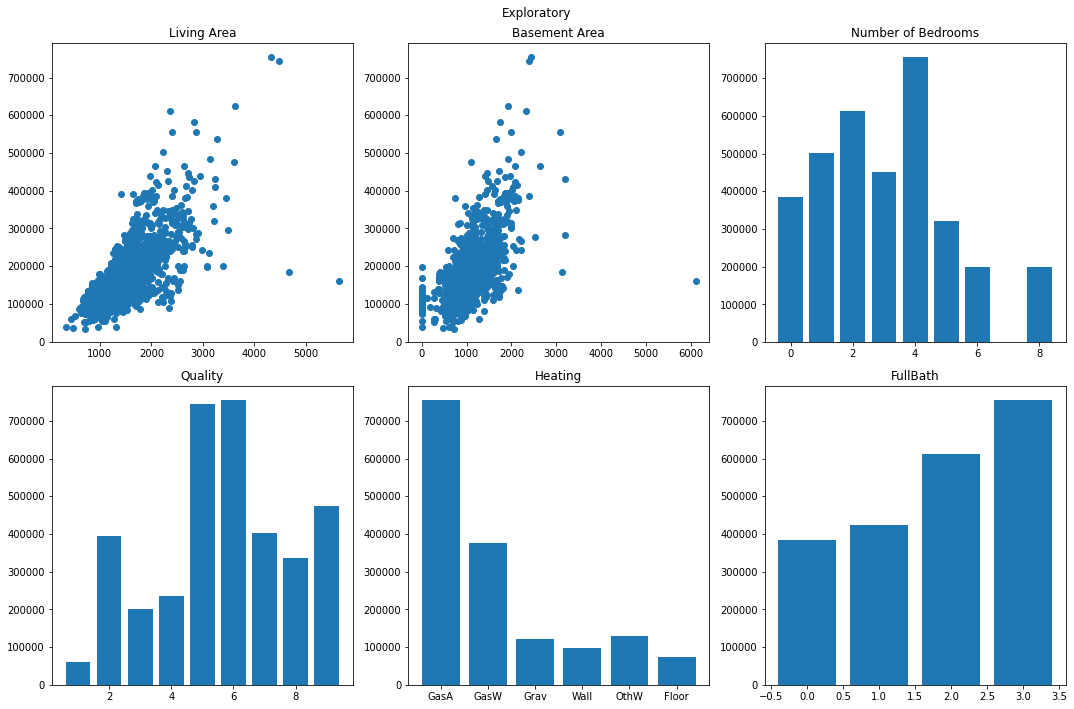

In [8]:
fig, axes = plt.subplots(2,3,figsize = (15,10))
fig.suptitle("Exploratory")
axes[0,0].scatter(hp_data["GrLivArea"],hp_data["SalePrice"])
axes[0,0].set_title("Living Area")
axes[0,1].scatter(hp_data["TotalBsmtSF"],hp_data["SalePrice"])
axes[0,1].set_title("Basement Area")
axes[0,2].bar(hp_data["BedroomAbvGr"],hp_data["SalePrice"])
axes[0,2].set_title("Number of Bedrooms")
axes[1,0].bar(hp_data["OverallCond"],hp_data["SalePrice"])
axes[1,0].set_title("Quality")

axes[1,1].bar(hp_data["Heating"],hp_data["SalePrice"])
axes[1,1].set_title("Heating")
axes[1,2].bar(hp_data["FullBath"].astype("category"),hp_data["SalePrice"])
axes[1,2].set_title("FullBath")


plt.tight_layout()


# Hiányzó értékek

In [9]:
total = hp_data.isnull().sum().sort_values(ascending=False)
percent = (hp_data.isnull().sum()/hp_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [11]:
fill_dict ={
    'PoolQC': 'NA',
    'MiscFeature':'NA',
    'Alley': 'NA',
    'Fence': 'NA',
    'GarageQual': 'NA'
}
# A többi házi....
for col, mv in fill_dict.items():
    hp_data[col].fillna(mv, inplace = True)
# drop cols with missing vals
for col in hp_data.columns:
    if any(hp_data[col].isna()):
        hp_data.drop(col,axis=1,inplace=True)
        print(f"Dropping {col}")

In [12]:
hp_data.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotArea          1460
Street           1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 67, dtype: int64

In [13]:
# most csak a numerikus dolgokat tartom meg, a One Hot Encoding szintén házi!
hp_data_numeric = hp_data.select_dtypes("number")
hp_data_numeric.count()

Id               1460
MSSubClass       1460
LotArea          1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
BsmtFinSF1       1460
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
1stFlrSF         1460
2ndFlrSF         1460
LowQualFinSF     1460
GrLivArea        1460
BsmtFullBath     1460
BsmtHalfBath     1460
FullBath         1460
HalfBath         1460
BedroomAbvGr     1460
KitchenAbvGr     1460
TotRmsAbvGrd     1460
Fireplaces       1460
GarageCars       1460
GarageArea       1460
WoodDeckSF       1460
OpenPorchSF      1460
EnclosedPorch    1460
3SsnPorch        1460
ScreenPorch      1460
PoolArea         1460
MiscVal          1460
MoSold           1460
YrSold           1460
SalePrice        1460
dtype: int64

# Regresszió

Feltételezések:
* Normalitás
    - A változókra is!
    - Házikéne szedjétek ki a skewt a változókból, vagy clippinggel vagy logaritmussal
     - ügyeljetek arra az esetre, amikor 0 van a változóban
    * Ha ez megvan, nézzetek utána a Box - Cox transszformációnak
* Homoszkedaszticitás
* Linearitás
* Független hibák
* Nincs multikorrealitás

In [14]:
from sklearn.model_selection import train_test_split
y = hp_data_numeric["SalePrice"]
X = hp_data_numeric.drop("SalePrice",axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)

# Model 0: Átlag

In [15]:
pred_test  = [y_train.mean()]*y_test.shape[0]
pred_train  = [y_train.mean()]*y_train.shape[0]


## Diagnosztika


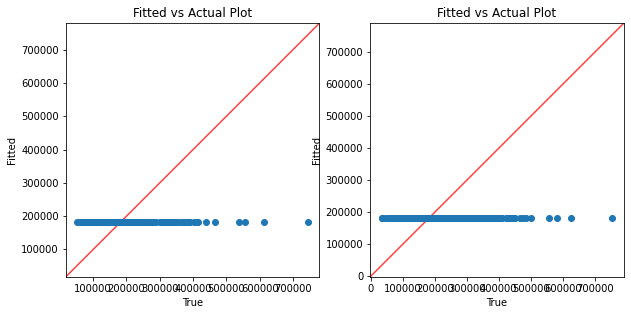

In [16]:
def fitted_vs_actual_plot(y_true,y_pred,ax):
    
    ax.scatter(y_true,y_pred)
    ax.set_ylabel("Fitted")
    ax.set_xlabel("True")
    ax.set_title("Fitted vs Actual Plot")
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0,color="r")
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
fig,axes = plt.subplots(1,2,figsize = (10,5))

fitted_vs_actual_plot(y_test,pred_test,axes[0])
fitted_vs_actual_plot(y_train,pred_train,axes[1])

## Metrikák

* R^2
* MSE
* RMSE
* MAE
* MAPE

$$ \operatorname{R^2} = \frac{SSR}{SST} $$


* **SST** (Sum of the Total Squared Error) is the total residual.
$$\operatorname{SST} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2$$
* **SSR** (Sum of the Squared Regression) is the residual explained by the regression line
$$SSR = \sum_{i=1}^n \left(\hat{y_i} - \bar{y}\right)^2$$
* **SSE** (Sum of the Squared Error) is the rest
$$SST = SSR + SSE$$

$R^2$ Értelmezése: A modell **magyaráézóereje**
 Problémája: Több változó, magasabb $R^2$
 Megoldás? --> Házi

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def analyize_prediction_metrics(y_true,y_pred):
    mse = mean_squared_error(y_true,y_pred)
    mae = mean_absolute_error(y_true,y_pred)
    r2 = r2_score(y_true,y_pred)
    print(f"Regression Metrics: \n MSE: {mse} \n MAE: {mae} \n R2:{r2}")
    # Házi: Legyen szebb az output, és implementáljátok le a MAPE-t, és tegyétek be az RMSE-t
analyize_prediction_metrics(y_test,pred_test)
analyize_prediction_metrics(y_train,pred_train)

Regression Metrics: 
 MSE: 6475441804.280731 
 MAE: 57198.31331619275 
 R2:-0.00033930275786886455
Regression Metrics: 
 MSE: 6224026470.107758 
 MAE: 57727.841481927564 
 R2:0.0


# Modell 1: 1 Változó

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
def fit_and_model_and_predict(model,X_train,X_test,y_train):
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    return model, pred_train, pred_test
y = hp_data_numeric["SalePrice"]
X = hp_data_numeric["GrLivArea"].to_frame()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)
model, pred_train, pred_test = fit_and_model_and_predict(lr,X_train,X_test,y_train)


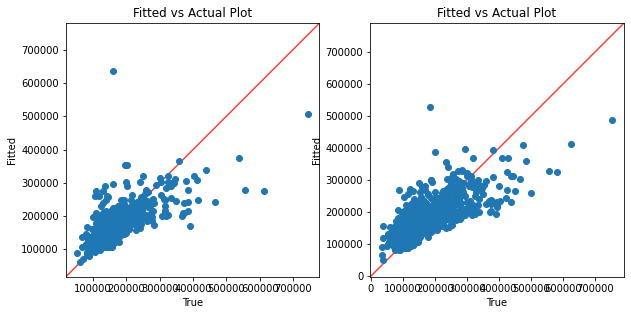

In [19]:
fig,axes = plt.subplots(1,2,figsize = (10,5))
fitted_vs_actual_plot(y_test,pred_test,axes[0])
fitted_vs_actual_plot(y_train,pred_train,axes[1])

In [20]:
analyize_prediction_metrics(y_test, pred_test)
analyize_prediction_metrics(y_train, pred_train)

Regression Metrics: 
 MSE: 3534905504.298918 
 MAE: 37894.69106189475 
 R2:0.4539206722315513
Regression Metrics: 
 MSE: 2949937928.9024954 
 MAE: 37708.551585445115 
 R2:0.5260402662054515


# Modell 2: Minden numerikus

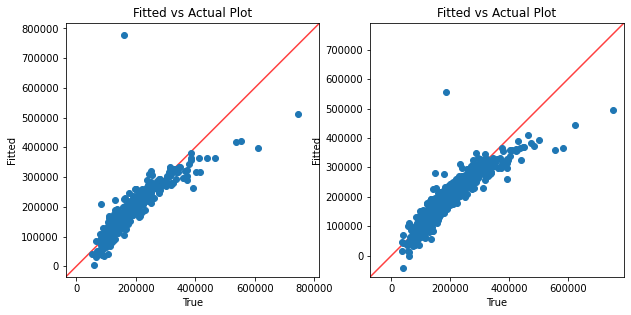

In [21]:
y = hp_data_numeric["SalePrice"]
X = hp_data_numeric.drop("SalePrice",axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)
model, pred_train, pred_test = fit_and_model_and_predict(lr,X_train,X_test,y_train)
fig,axes = plt.subplots(1,2,figsize = (10,5))
fitted_vs_actual_plot(y_test,pred_test,axes[0])
fitted_vs_actual_plot(y_train,pred_train,axes[1])

# Házi: Vegyétek ki az outliereket valamilyen módszerrel

In [23]:
analyize_prediction_metrics(y_test,pred_test)
analyize_prediction_metrics(y_train,pred_train)

Regression Metrics: 
 MSE: 1749994236.689709 
 MAE: 21495.04228954936 
 R2:0.7296573627758945
Regression Metrics: 
 MSE: 1016592626.0780102 
 MAE: 20476.54544298858 
 R2:0.836666403820675


# Modelldiagnosztika

## Fontosabb változók

In [25]:
def get_coefficients(model,X_train):
    return pd.Series(lr.coef_,index = X_train.columns)
get_coefficients(lr,X_train).head()

Id                 0.256672
MSSubClass      -151.801814
LotArea            0.456609
OverallQual    16975.814830
OverallCond     4281.650701
dtype: float64

<AxesSubplot:>

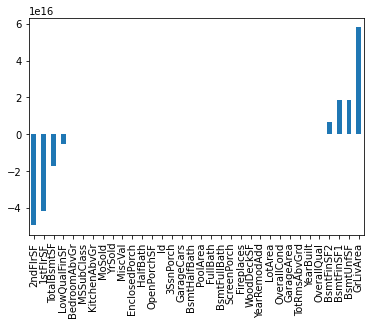

In [26]:
# Különböző nagyságúak, így nehéz összehasonlítani
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
model, pred_train, pred_test = fit_and_model_and_predict(lr,X_train_scaled,X_test_scaled,y_train)
get_coefficients(lr,X_train).sort_values().plot(kind="bar")
# Miért van ez?!

# Modell 3: Döntési fa

Regression Metrics: 
 MSE: 1382303019.7634854 
 MAE: 25313.219917012448 
 R2:0.7864590431380002
Regression Metrics: 
 MSE: 0.0 
 MAE: 0.0 
 R2:1.0


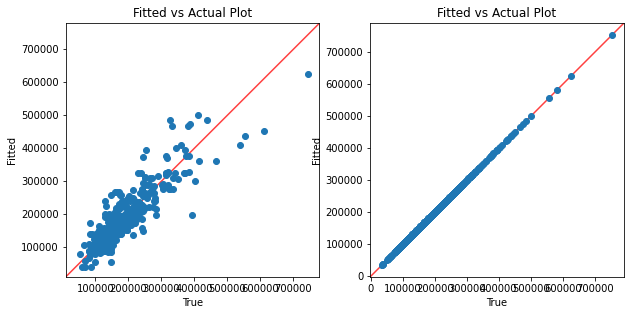

In [101]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model, pred_train, pred_test = fit_and_model_and_predict(dt,X_train,X_test,y_train)
fig,axes = plt.subplots(1,2,figsize = (10,5))

fitted_vs_actual_plot(y_test,pred_test,axes[0])
fitted_vs_actual_plot(y_train,pred_train,axes[1])

analyize_prediction_metrics(y_test,pred_test)
analyize_prediction_metrics(y_train,pred_train)

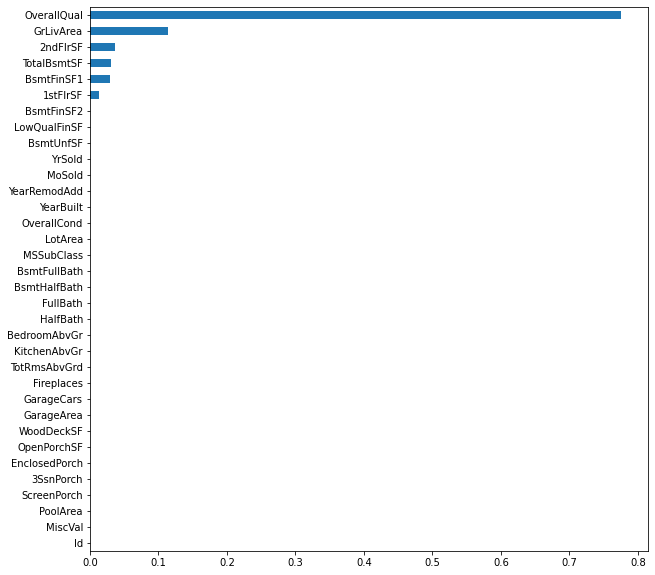

In [112]:
def dt_feature_importance_plot(model,X_train):
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    pd.Series(model.feature_importances_,index = X_train.columns).sort_values().plot(kind="barh")
dt_feature_importance_plot(dt,X_train)

Regression Metrics: 
 MSE: 1695917060.9785068 
 MAE: 29742.897939719638 
 R2:0.7380113138855003
Regression Metrics: 
 MSE: 1581809886.063217 
 MAE: 29513.601721884883 
 R2:0.7458542482651378


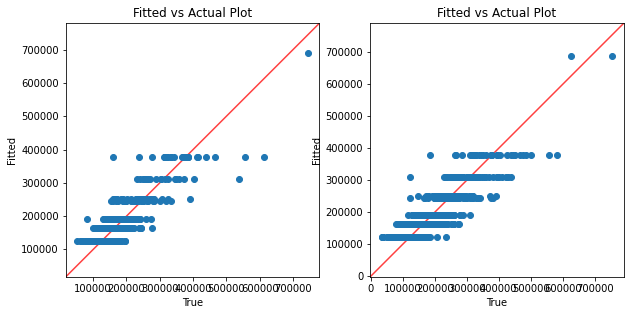

In [126]:
dt = DecisionTreeRegressor(max_depth = 3)
model, pred_train, pred_test = fit_and_model_and_predict(dt,X_train,X_test,y_train)
fig,axes = plt.subplots(1,2,figsize = (10,5))

fitted_vs_actual_plot(y_test,pred_test,axes[0])
fitted_vs_actual_plot(y_train,pred_train,axes[1])

analyize_prediction_metrics(y_test,pred_test)
analyize_prediction_metrics(y_train,pred_train)

# Házi: Keressetek jobb paramétereket! Nem csak  max depthel lehet kontrollálni az overfittingre

# Modell 4: Random Forest

Regression Metrics: 
 MSE: 1459121148.6966267 
 MAE: 25873.40600082659 
 R2:0.7745920237347306
Regression Metrics: 
 MSE: 1184195108.1200697 
 MAE: 24779.527351841632 
 R2:0.8097380989930836


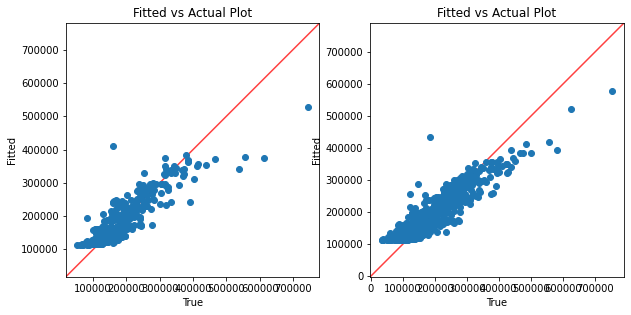

In [127]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth  =3)
model, pred_train, pred_test = fit_and_model_and_predict(rf,X_train,X_test,y_train)
fig,axes = plt.subplots(1,2,figsize = (10,5))

fitted_vs_actual_plot(y_test,pred_test,axes[0])
fitted_vs_actual_plot(y_train,pred_train,axes[1])

analyize_prediction_metrics(y_test,pred_test)
analyize_prediction_metrics(y_train,pred_train)


# Modell 5: Stacked Regressor

Regression Metrics: 
 MSE: 1029849924.4942653 
 MAE: 19190.60578297326 
 R2:0.8409067077503806
Regression Metrics: 
 MSE: 770720218.9532751 
 MAE: 17941.06352869662 
 R2:0.8761701572679957


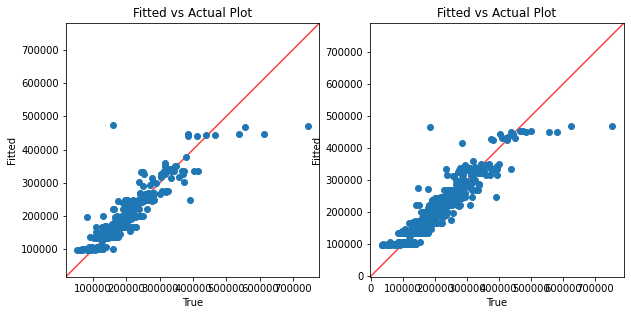

In [132]:
from sklearn.ensemble import StackingRegressor
estimators = [('lr', LinearRegression()),('rf',RandomForestRegressor(max_depth =2))]
reg = StackingRegressor(estimators = estimators, final_estimator=RandomForestRegressor(max_depth =3))
model, pred_train, pred_test = fit_and_model_and_predict(reg,X_train,X_test,y_train)
fig,axes = plt.subplots(1,2,figsize = (10,5))

fitted_vs_actual_plot(y_test,pred_test,axes[0])
fitted_vs_actual_plot(y_train,pred_train,axes[1])

analyize_prediction_metrics(y_test,pred_test)
analyize_prediction_metrics(y_train,pred_train)


In [133]:
# Mi a baj ezzel?

# Model 6: Support Vector Machine

svr_lin
Regression Metrics: 
 MSE: 0.5662106838532411 
 MAE: 0.47989025335366886 
 R2:0.45558833962984735
Regression Metrics: 
 MSE: 0.48014333963767014 
 MAE: 0.4731787554656462 
 R2:0.5198566603623298
svr_poly_2


/home/karpatika/rajk_machine_learning_course/gtk/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/karpatika/rajk_machine_learning_course/gtk/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Regression Metrics: 
 MSE: 1.070723046084469 
 MAE: 0.7138748443603706 
 R2:-0.02950037492849833
Regression Metrics: 
 MSE: 0.8920853223931194 
 MAE: 0.6951044504028895 
 R2:0.10791467760688056
svr_poly_3


/home/karpatika/rajk_machine_learning_course/gtk/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Regression Metrics: 
 MSE: 5.184083463441298 
 MAE: 0.7117355249314072 
 R2:-3.9844970543880587
Regression Metrics: 
 MSE: 1.1844785987851907 
 MAE: 0.6283409112532513 
 R2:-0.18447859878519068
svr_rbf
Regression Metrics: 
 MSE: 0.5719970059970104 
 MAE: 0.47697588186047835 
 R2:0.450024789990889
Regression Metrics: 
 MSE: 0.49359447693722397 
 MAE: 0.4699135468487604 
 R2:0.506405523062776


/home/karpatika/rajk_machine_learning_course/gtk/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


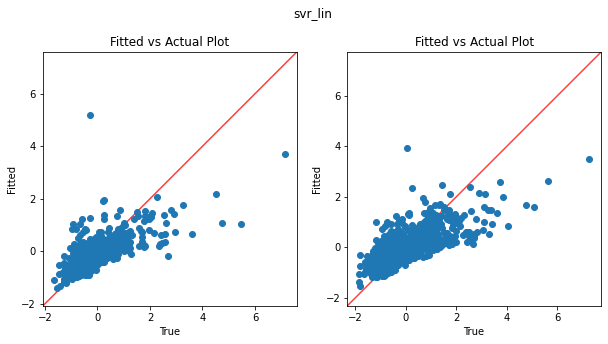

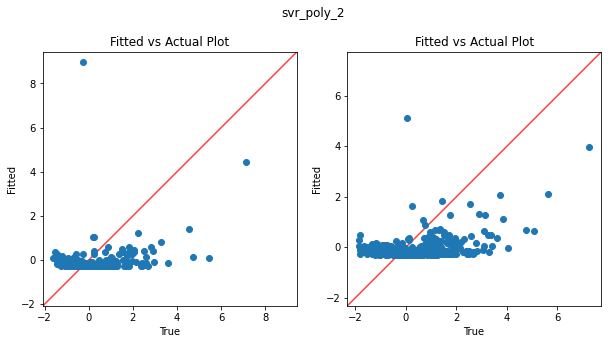

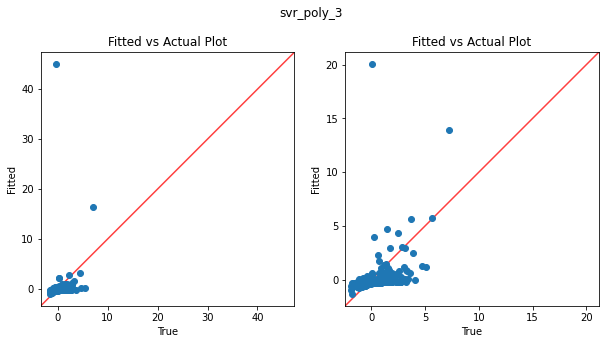

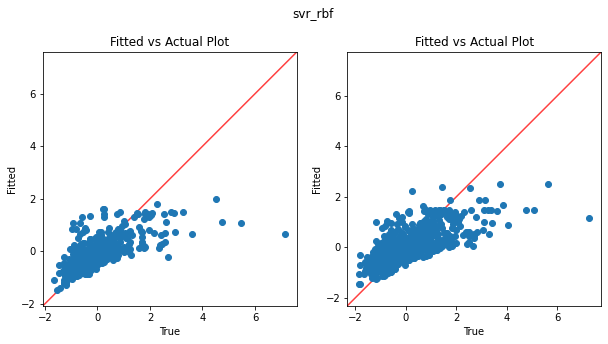

In [30]:
# Support Vector Machine
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear')
svr_poly_2 = SVR(kernel='poly', degree = 2)
svr_poly_3 = SVR(kernel='poly', degree = 3)
svr_rbf = SVR(kernel='rbf')

y = hp_data_numeric["SalePrice"].to_frame()
X = hp_data_numeric["GrLivArea"].to_frame()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)
sc_x = StandardScaler()
X_train_scaled = sc_x.fit_transform(X_train)
X_test_scaled = sc_x.transform(X_test)
sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train)
y_test_scaled = sc_y.transform(y_test)

for model_name, model in [('svr_lin',svr_lin),("svr_poly_2",svr_poly_2),("svr_poly_3",svr_poly_3),
                         ("svr_rbf",svr_rbf)]:
    print(model_name)
    
    model, pred_train, pred_test = fit_and_model_and_predict(model,X_train_scaled,X_test_scaled,y_train_scaled)
    fig,axes = plt.subplots(1,2,figsize = (10,5))

    fitted_vs_actual_plot(y_test_scaled,pred_test,axes[0])
    fitted_vs_actual_plot(y_train_scaled,pred_train,axes[1])
    fig.suptitle(model_name)
    analyize_prediction_metrics(y_test_scaled,pred_test)
    analyize_prediction_metrics(y_train_scaled,pred_train)



In [31]:
hp_data_outliers = (hp_data_numeric["SalePrice"]<400000)&(hp_data_numeric["GrLivArea"]>4000)
hp_data_numeric_no_outliers = hp_data_numeric[~hp_data_outliers].copy(deep=True)

svr_lin


/home/karpatika/rajk_machine_learning_course/gtk/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Regression Metrics: 
 MSE: 0.4760291715267204 
 MAE: 0.47405334723498055 
 R2:0.5454268326434869
Regression Metrics: 
 MSE: 0.4793695546193662 
 MAE: 0.4678781431868715 
 R2:0.5206304453806339
svr_poly_2


/home/karpatika/rajk_machine_learning_course/gtk/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Regression Metrics: 
 MSE: 0.8984134678822027 
 MAE: 0.7255753751523417 
 R2:0.14208061161218588
Regression Metrics: 
 MSE: 0.8204193460173904 
 MAE: 0.6765791175562509 
 R2:0.17958065398260958
svr_poly_3


/home/karpatika/rajk_machine_learning_course/gtk/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Regression Metrics: 
 MSE: 0.7274966581588586 
 MAE: 0.611950364839949 
 R2:0.30529370903903097
Regression Metrics: 
 MSE: 0.8677599848960182 
 MAE: 0.6124494067372593 
 R2:0.13224001510398176
svr_rbf


/home/karpatika/rajk_machine_learning_course/gtk/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Regression Metrics: 
 MSE: 0.4940929298258217 
 MAE: 0.48065253846348077 
 R2:0.5281772598955612
Regression Metrics: 
 MSE: 0.4949672259037034 
 MAE: 0.46798496694765224 
 R2:0.5050327740962965


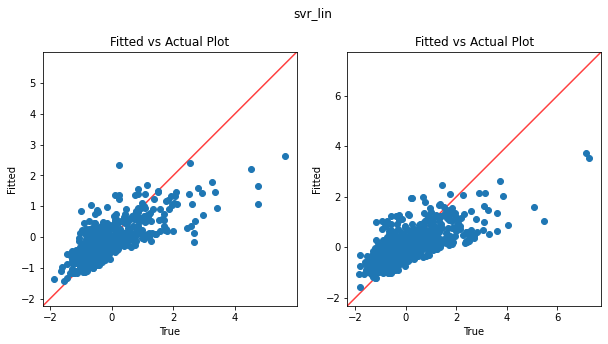

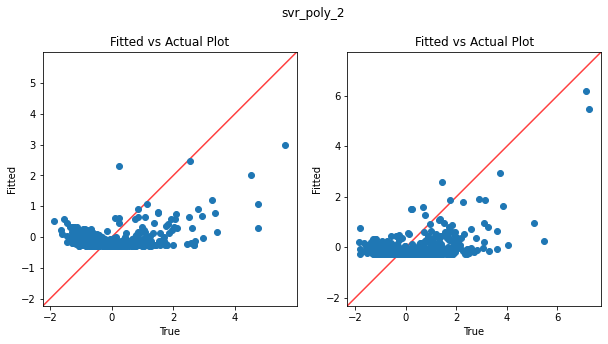

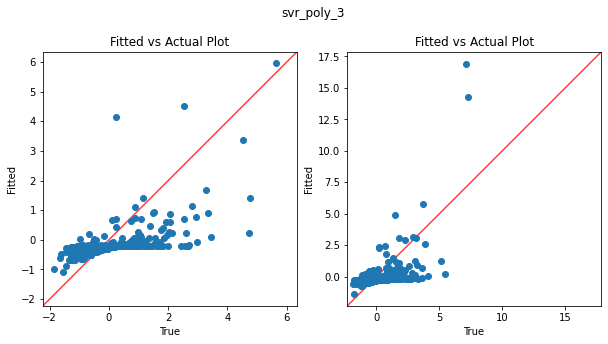

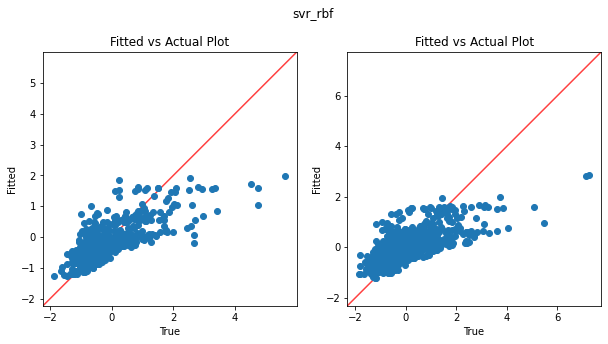

In [32]:
y = hp_data_numeric_no_outliers["SalePrice"].to_frame()
X = hp_data_numeric_no_outliers['GrLivArea'].to_frame()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)
sc_x = StandardScaler()
X_train_scaled = sc_x.fit_transform(X_train)
X_test_scaled = sc_x.transform(X_test)
sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train)
y_test_scaled = sc_y.transform(y_test)

for model_name, model in [('svr_lin',svr_lin),("svr_poly_2",svr_poly_2),("svr_poly_3",svr_poly_3),
                         ("svr_rbf",svr_rbf)]:
    print(model_name)
    
    model, pred_train, pred_test = fit_and_model_and_predict(model,X_train_scaled,X_test_scaled,y_train_scaled)
    fig,axes = plt.subplots(1,2,figsize = (10,5))

    fitted_vs_actual_plot(y_test_scaled,pred_test,axes[0])
    fitted_vs_actual_plot(y_train_scaled,pred_train,axes[1])
    fig.suptitle(model_name)
    analyize_prediction_metrics(y_test_scaled,pred_test)
    analyize_prediction_metrics(y_train_scaled,pred_train)


svr_lin


/home/karpatika/rajk_machine_learning_course/gtk/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Regression Metrics: 
 MSE: 0.16272058036562098 
 MAE: 0.25327707958542434 
 R2:0.8446137042953503
Regression Metrics: 
 MSE: 0.1490530434936091 
 MAE: 0.2407062826592419 
 R2:0.850946956506391
svr_poly_2


/home/karpatika/rajk_machine_learning_course/gtk/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Regression Metrics: 
 MSE: 0.4750844579901969 
 MAE: 0.4344213209502707 
 R2:0.5463289652232294
Regression Metrics: 
 MSE: 0.17380351238129585 
 MAE: 0.27189906570288164 
 R2:0.8261964876187041
svr_poly_3


/home/karpatika/rajk_machine_learning_course/gtk/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Regression Metrics: 
 MSE: 0.26889828883679234 
 MAE: 0.29219488524327347 
 R2:0.7432217305900423
Regression Metrics: 
 MSE: 0.031647716167772316 
 MAE: 0.126383415449891 
 R2:0.9683522838322277
svr_rbf


/home/karpatika/rajk_machine_learning_course/gtk/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Regression Metrics: 
 MSE: 0.17270879217204224 
 MAE: 0.24272541736088632 
 R2:0.835075689928477
Regression Metrics: 
 MSE: 0.11597985200203156 
 MAE: 0.14111349215018026 
 R2:0.8840201479979685


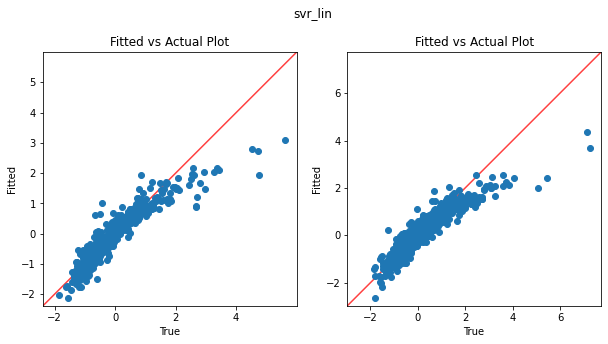

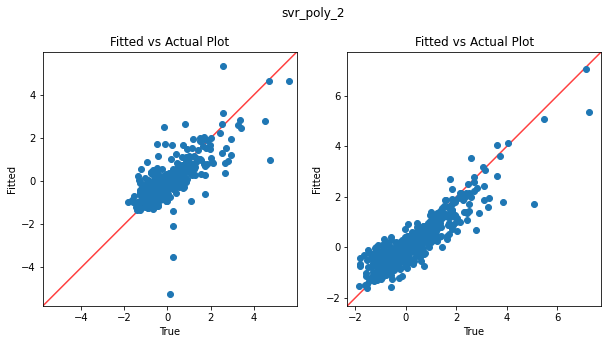

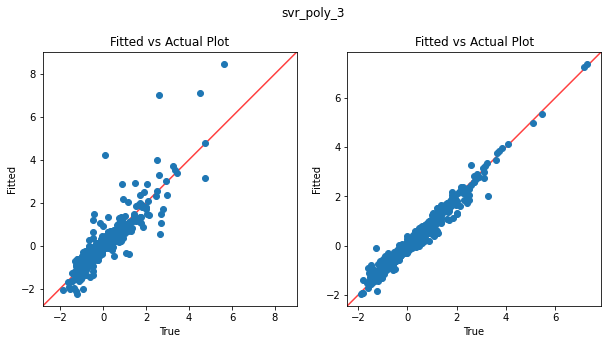

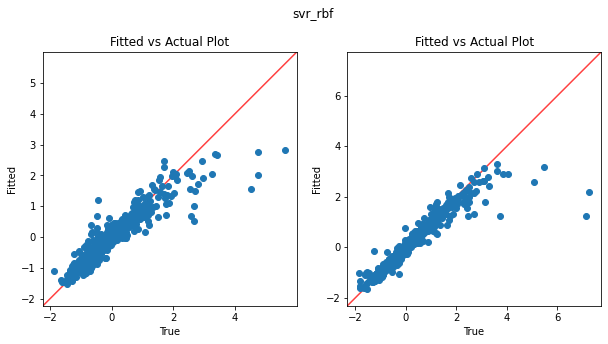

In [33]:
y = hp_data_numeric_no_outliers["SalePrice"].to_frame()
X = hp_data_numeric_no_outliers.drop('SalePrice',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)
sc_x = StandardScaler()
X_train_scaled = sc_x.fit_transform(X_train)
X_test_scaled = sc_x.transform(X_test)
sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train)
y_test_scaled = sc_y.transform(y_test)

for model_name, model in [('svr_lin',svr_lin),("svr_poly_2",svr_poly_2),("svr_poly_3",svr_poly_3),
                         ("svr_rbf",svr_rbf)]:
    print(model_name)
    
    model, pred_train, pred_test = fit_and_model_and_predict(model,X_train_scaled,X_test_scaled,y_train_scaled)
    fig,axes = plt.subplots(1,2,figsize = (10,5))

    fitted_vs_actual_plot(y_test_scaled,pred_test,axes[0])
    fitted_vs_actual_plot(y_train_scaled,pred_train,axes[1])
    fig.suptitle(model_name)
    analyize_prediction_metrics(y_test_scaled,pred_test)
    analyize_prediction_metrics(y_train_scaled,pred_train)
